# Lectura y escritura de ficheros

En la mayoría de problemas de ciencia de datos necesitamos leer los datos desde algún archivo y podemos necesitar escribir los resultados en otro.  
<ul style="list-style-type:none">
    <li><a href='#1.-Ficheros-de-texto'>1. Ficheros de texto</a></li>
       <li><a href='#2.-Librería-os'>2. Librería os</a></li>
       <li><a href='#3.-Pandas'>3. Pandas</a></li>    
      <li><a href="#4.-Ejercicios-para-practicar">4. Ejercicios </a></li>
    <ul style="list-style-type:none">
</ul>

## 1. Ficheros de texto
Para abrir un fichero usaremos la función predeterminada `open` y para cerrarla el método `close`.

In [ ]:
f = open('test.txt', 'w') # path puede ser absoluto o relativo
f.write("prueba")         # Escribimos la palabra 'prueba' en el archivo
f.close()                 # cerramos archivo

Siempre hay que recordar cerrar el archivo al terminar, porque si no estamos gastanto recursos innecesariamente. Alternativamente, podemos usar la sentencia `with` al abrir el archivo, así cuando salimos de ese contexto, Python cierra automáticamente el archivo.

In [ ]:
with open('test2.txt', 'w') as f:
    # Escribimos 'otra prueba' en el archivo
    f.write("otra prueba")

In [ ]:
# "r" nos permite leer
with open('test2.txt', 'r') as f:
    print(f.read())

otra prueba


La función `open` coge como primer argumento el *path* (relativo o absoluto) y como segundo el modo de apertura. Con este modo especificamos con qué finalidad se abre el fichero. Los más comunes son:

En relación con el modo de apertura, Python reconoce los siguientes modificadores, que se pueden combinar entre ellos para especificar cómo y con qué finalidad se abre el fichero:

* `r`, modo de lectura (del inglés, _**r**eading_).
* `w`, modo de escritura (del inglés, _**w**riting_), sobrescribe el contenido del archivo si éste ya existe, o bien crea el archivo si no existe.
* `a`, modo de escritura, escribe al final del archivo, después del contenido ya existente en el archivo (del inglés, _**a**ppend_), o bien crea el archivo si no existe.

Podéis ver todos los posibles modos [aquí](https://docs.python.org/3/library/functions.html#open)

Tal como hemos usado el método `read` leemos todo el contenido del fichero a la vez. Cuando el fichero es muy grande esto puede no ser lo más eficiente, sobretodo si no necesitamos todo el contenido del archivo. Para eso podemos ir línea a línea:

In [ ]:
with open('test.txt', 'r') as f:
    for line in f:
        print(line)

prueba


### **EJERCICIOS para practicar**

**1.** Lee el archivo fichero1.txt que tenéis con la unidad línea a linea. Añade otra línea al fichero sin borrar lo que había y guárdalo. 

In [9]:
# Código
with open("fichero1.txt", "a") as f:
    f.write("hÓy es jueves")

with open("fichero1.txt", "r") as f:
    print(f.read())

        

hoy es el primer día del curso
es soportable :)
mañana más
otra linea
hoy es jueveshoy es jueveshoy es jueveshoy es jueveshÓy es jueves


## 2. Librería os
El módulo `os` nos permite interaccionar con el sistema y gestionar archivos. Aquí veremos algunas cosas como abrir y cerrar carpetas, pero podéis ver los detalles [aquí](https://docs.python.org/3/library/os.html). 

In [ ]:
import os  # cargamos módulo

folder = "nueva_carpeta"
os.mkdir(folder)

También podríamos abrir varias carpetas contenidas unas en otras a la vez con `makedirs`, por ejemplo:


In [ ]:
folder = "nueva_carpeta/test1/test2"
os.makedirs(folder)

Y ahora ya podríamos escribir un archivo dentro de algunas de estas carpetas: 

In [ ]:
with open('nueva_carpeta/fichero_de_prueba.txt', 'a') as f:
    f.write("más pruebas")

También podemos borrar archivos o carpetas

In [ ]:
os.remove('test2.txt')

Podéis ver todos las funciones:

In [ ]:
os.

Otra función de ´os´ muy útil es poder hacer una lista de los archivos que tenemos en una carpeta. 

In [ ]:
os.listdir()

['nueva_carpeta',
 'Unidad 2_5 Lectura_y_escritura_de_ficheros.ipynb',
 'test.txt',
 '.ipynb_checkpoints']

Para escoger solo las notebooks `.ipynb` solo tendría que analizar la lista 

In [ ]:
# o de forma más compacta podemos usar una list comprehension:
l2_txt = [file_name for file_name in os.listdir() if file_name.endswith(".ipynb")]
print(l2_txt)

['Unidad 2_5 Lectura_y_escritura_de_ficheros.ipynb']


En esta notebook hemos visto como arbir y cerrar archivos de texto, para leer bases de datos en otros formatos se suele usar `pandas` y `PySQL`.

### **EJERCICIOS para practicar**

2. Crea una función para borrar carpetas no vacías.

In [ ]:
# Código
import os

def borra_carpeta(nombre):
    print(nombre)
    lista_ficheros = os.listdir(nombre)
    print(lista_ficheros)
    for elemento in lista_ficheros:
        if os.path.isdir(nombre+'/'+elemento):
            borra_carpeta(nombre+'/'+elemento)
        else:
            print(nombre+'/'+elemento)
            os.remove(nombre+'/'+elemento)
    os.rmdir(nombre)  

def eliminar(ruta):
    contenido = os.listdir(ruta)
    print("Contenido: " + str(contenido))  

    for fichero in contenido:
        ruta_fichero = os.path.join(ruta, fichero)  
        if os.path.isdir(ruta_fichero):
            eliminar(ruta_fichero)  
        else:
            os.remove(ruta_fichero)  
            print("Se ha eliminado el fichero: " + fichero)  
    os.rmdir(ruta)
    print("Se ha borrado la carpeta")

borra_carpeta("/home/ciabd14/Escritorio/EJEMPLO")



/home/ciabd14/Escritorio/EJEMPLO
['EEEEEEEEEE']
/home/ciabd14/Escritorio/EJEMPLO/EEEEEEEEEE
[]


## 3. Pandas

**Pandas** es una librería para generar, manipular y recoger datos desde una **base de datos relacional**. Con pandas se nos hace muy simple leer ficheros en los formatos que solemos encontrar muchos de los datos con los que querremos trabajar como `csv`, `excel` o `json`. **Pandas** tiene muchas funcionalidades pero aquí nos centraremos en las básicas para leer y escribir ficheros. 

In [14]:
import pandas as pd

In [ ]:
# Leer
df_municipios = pd.read_csv("Centroides_NucleosPoblacion.csv" )
# read_csv() nos devuelve un dataframe de pandas.
df_municipios

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...,...
847,847,848,30030000108,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,30030000124,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,30030000126,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,45168000102,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


Con el método head de los dataframes de pandas podemos ver un número determinado de filas del dataframe. Su uso es dataframe.head(n) donde n es el número de filas. Por defecto el valor de n es 5.

In [19]:
df_municipios.head()

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [ ]:
# podemos ver una lista de la cabecera
print(list(df_municipios))

['FID', 'OBJECTID', 'Cod_INE', 'Texto', 'Poblacion', 'CodMun', 'Municipio', 'Cod_Provin', 'Provincia', 'X', 'Y']


In [ ]:
# sacar algunas estadísticas de las variables númericas
df_municipios.describe()

,FID,OBJECTID,Cod_INE,Poblacion,CodMun,Cod_Provin,X,Y
count,852.00000,852.00000,8.520000e+02,8.520000e+02,852.000000,852.000000,852.000000,852.000000
mean,425.50000,426.50000,2.506476e+10,4.571086e+04,25064.747653,24.974178,-3.449561,39.168865
std,246.09551,246.09551,1.428876e+10,1.405981e+05,14288.756872,14.289414,4.602387,3.682011
min,0.00000,1.00000,1.002000e+09,1.003700e+04,1002.000000,1.000000,-17.914361,27.770340
25%,212.75000,213.75000,1.102700e+10,1.368975e+04,11027.000000,11.000000,-5.692163,37.591777
50%,425.50000,426.50000,2.805950e+10,1.986500e+04,28059.500000,28.000000,-3.253442,39.593034
75%,638.25000,639.25000,3.605627e+10,3.495075e+04,36056.250000,36.000000,-0.418458,41.630062
max,851.00000,852.00000,5.200100e+10,3.273049e+06,52001.000000,52.000000,4.265466,43.625578


In [20]:
# podemos ver una sola columna
df_municipios['Poblacion'].to_frame()

,Poblacion
0,29431.0
1,10458.0
2,58156.0
3,36745.0
4,24473.0
...,...
847,14192.0
848,13349.0
849,15208.0
850,19177.0


In [1]:
# podemos filtrar
df_municipios.loc[df_municipios['Poblacion'] > 1E6]['Texto']

NameError: ignored

<AxesSubplot:>

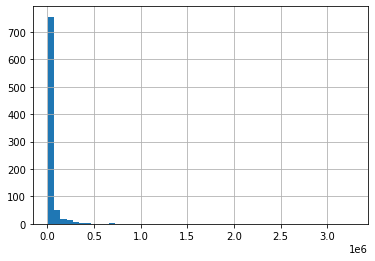

In [ ]:
df_municipios['Poblacion'].hist(bins=50)

Para leer un excel sería igual usando: `read_excel`, y un json: `read_json`. 
También podemos generar un data frame y guardarlo en el formato que queramos.

En el siguiente ejemplo vemos como generar 3 columnas de datos con 3 herramientas diferentes de numpy. 

a) está generada con np.arrange() que devuelve valores equiespaciados y tiene los siguientes parámetros (entre otros): numpy.arange([start, ]stop, [step]). start es el comienzo (por defecto 0), stop el número final (obligatorio) y step es el intervalo (por defecto 1). Fijaros en que a todos los valores se les suma 8.

b) está generada con randn que devuelve una muestra de valores con una distribución estándard normal. Puede devolver varias dimensiones en este caso solo se especifica el valor de una dimensión, que será 12.

c) está generada con linspace, que también devuelve una muestra de valores equiespaciados. En este caso 12 valores entre 18 y 25.

In [ ]:
import numpy as np
a = np.arange(12)+8
b = np.random.randn(12)
c = np.linspace(18.0, 25.0, num=12)  
    
df = pd.DataFrame({ 'A' : a,'B' : b,'C' : c}) 

df 

,A,B,C
0,8,1.363807,18.000000
1,9,0.805857,18.636364
2,10,-1.839256,19.272727
3,11,-1.645633,19.909091
4,12,0.607291,20.545455
5,13,1.545743,21.181818
6,14,-0.589087,21.818182
7,15,0.085965,22.454545
8,16,0.799880,23.090909
9,17,-1.756461,23.727273


A continuación guardamos el dataframe generado en dos archivos.

In [ ]:
# escribir archivos
df.to_csv("prueba_pandas.csv")
df.to_excel("prueba_pandas.xlsx")

### **EJERCICIOS para practicar**


**3.** Usando pandas lee el archivo csv winemag-data_first150k.csv sobre críticas de vinos y haz los siguientes pasos: 

3.1. Genera un nuevo dataframe con solo los vinos españoles. ¿Cuántos vinos hay ahora?

3.2. Haz un histograma de los precios generales, y otro con los precios españoles.
¿Puedes sacar alguna conclusión a simple vista?   (En la función hist, usa el parámetro opcional density = True para que estén normalizados)

3.3. Guarda el dataframe con solo los vinos españoles en un archivo llamado spanish_wines.csv

In [39]:
# Código
import pandas as pd
import numpy as np

df_vinos = pd.read_csv("winemag-data_first150k.csv")

vinos_espanoles = df_vinos[df_vinos["country"] == "Spain"]
vinos_espanoles



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
17,17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero
...,...,...,...,...,...,...,...,...,...,...,...
149601,149601,Spain,Toasty oak and tobacco shadings are wrapped ar...,Rioja Crianza,88,15.0,Northern Spain,Rioja,NaN,Tempranillo Blend,Bodegas Faustino
149819,149819,Spain,"This pleasant wine shows clean apple, hay and ...",NaN,86,7.0,Central Spain,Tierra Manchuela,NaN,Viura,Santana
149858,149858,Spain,Dried cherry and spice aromas and flavors acce...,Faustino VII,86,12.0,Northern Spain,Rioja,NaN,Tempranillo,Bodegas Faustino
149936,149936,Spain,"A straightforward basic red, with dried cherry...",NaN,84,7.0,Northern Spain,Rioja,NaN,Tempranillo,Santana


In [37]:
vinos_espanoles.describe()


,Unnamed: 0,points,price
count,8268.000000,8268.000000,8160.000000
mean,74946.796807,86.646589,27.048529
std,43514.477551,3.124243,33.861666
min,1.000000,80.000000,4.000000
25%,36495.750000,84.000000,12.000000
50%,74054.000000,87.000000,17.000000
75%,112367.250000,89.000000,28.000000
max,149993.000000,98.000000,770.000000


<Axes: >

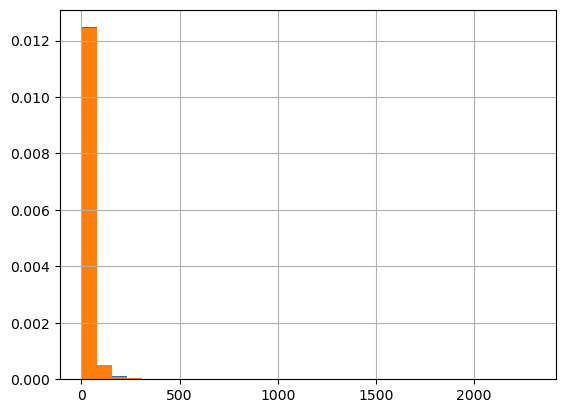

In [51]:
vinos_espanoles["price"].hist(density=True)
df_vinos["price"].hist(bins=30,density=True)

<Axes: >

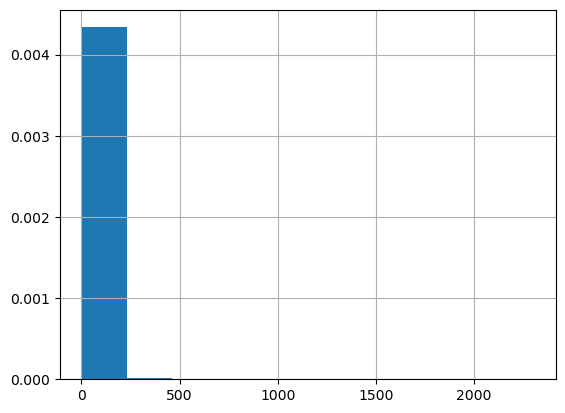

In [48]:
df_vinos["price"].hist(bins=10,density=True)

In [41]:
vinos_espanoles.to_csv("spanish_wines.csv")
vinos_espanoles.to_excel("spanish_wines.xlsx")

**4.** Escribe una función que coja un path de un directorio, compruebe que el directorio exista, que cuente cuántos archivos hay dentro y qué extensión tienen. Para hacerlo te serán útiles las funciones de `os.path` que tenéis en [aquí](https://docs.python.org/3/library/os.path.html) 

4.1 Aplica esta función a una carpeta que tengáis en este directorio. 


In [64]:
# Código 
import os

def comprobar_carpeta(ruta):
    if os.path.exists(ruta) and os.path.isdir(ruta):
        print("El path existe")

        lista_ficheros = os.listdir(ruta)
        print("CONTENIDO PATH: " + str(lista_ficheros))
        count_archivos = 0
        
        for elemento in lista_ficheros:
            ruta_completa = os.path.join(ruta, elemento) 
            if os.path.isfile(ruta_completa):
                count_archivos += 1

                nombre_archivo, extension = os.path.splitext(elemento)
                print("Nombre: " + nombre_archivo + " Extension: " + extension)
    
        print("Cantidad de archivos: " + str(count_archivos))
    else:
        print("El path no existe")
    
comprobar_carpeta("/home/ciabd14/Escritorio/EJEMPLO")


El path existe
CONTENIDO PATH: ['test.txt', 'test (otra copia).txt', 'test (copia).txt']
Nombre: test Extension: .txt
Nombre: test (otra copia) Extension: .txt
Nombre: test (copia) Extension: .txt
Cantidad de archivos: 3
